
Original Features:


,count,mean,std,min,25%,50%,75%,max
ship_type,1440.0,1.583333,1.107809,0.00,1.0000,2.000,3.0000,3.00
ship_id_numeric,1440.0,59.500000,34.651847,0.00,29.7500,59.500,89.2500,119.00
month_numeric,1440.0,6.500000,3.453252,1.00,3.7500,6.500,9.2500,12.00
route_id,1440.0,1.422222,1.079627,0.00,0.0000,1.000,2.0000,3.00
distance,1440.0,151.753354,108.472230,20.08,79.0025,123.465,180.7800,498.55
fuel_type,1440.0,0.375694,0.484470,0.00,0.0000,0.000,1.0000,1.00
CO2_emissions,1440.0,13365.454882,13567.650118,615.68,4991.4850,8423.255,13447.1200,71871.21
weather_conditions,1440.0,0.962500,0.823548,0.00,0.0000,1.000,2.0000,2.00
engine_efficiency,1440.0,82.582924,7.158289,70.01,76.2550,82.775,88.8625,94.98



Feature-Engineered Dataset:


,count,mean,std,min,25%,50%,75%,max
ship_type,1440.0,1.583333,1.107809,0.000000,1.000000,2.000000,3.000000,3.000000
ship_id_numeric,1440.0,59.500000,34.651847,0.000000,29.750000,59.500000,89.250000,119.000000
month_numeric,1440.0,6.500000,3.453252,1.000000,3.750000,6.500000,9.250000,12.000000
route_id,1440.0,1.422222,1.079627,0.000000,0.000000,1.000000,2.000000,3.000000
distance,1440.0,151.753354,108.472230,20.080000,79.002500,123.465000,180.780000,498.550000
fuel_type,1440.0,0.375694,0.484470,0.000000,0.000000,0.000000,1.000000,1.000000
CO2_emissions,1440.0,13365.454882,13567.650118,615.680000,4991.485000,8423.255000,13447.120000,71871.210000
weather_conditions,1440.0,0.962500,0.823548,0.000000,0.000000,1.000000,2.000000,2.000000
engine_efficiency,1440.0,82.582924,7.158289,70.010000,76.255000,82.775000,88.862500,94.980000
fuel_per_distance,1440.0,28.368151,9.940104,9.829978,20.992081,28.428550,33.946162,49.815999



Original Variance:
CO2_emissions         1.840811e+08
distance              1.176622e+04
ship_id_numeric       1.200751e+03
engine_efficiency     5.124111e+01
month_numeric         1.192495e+01
ship_type             1.227241e+00
route_id              1.165593e+00
weather_conditions    6.782314e-01
fuel_type             2.347111e-01
dtype: float64

Engineered Variance:
total_energy_output     3.404062e+08
CO2_emissions           1.840811e+08
distance                1.176622e+04
ship_id_numeric         1.200751e+03
fuel_per_distance       9.880567e+01
engine_efficiency       5.124111e+01
month_numeric           1.192495e+01
ship_type               1.227241e+00
route_id                1.165593e+00
ship_profile_cluster    8.601416e-01
weather_conditions      6.782314e-01
fuel_type               2.347111e-01
co2_per_fuel            2.134624e-02
dtype: float64

🔴 Original Model:
R²: 0.9946187294435878
MAE: 222.3950760416663
RMSE: 380.5422500589818

🟢 Feature-Engineered Model:
R²: 0.99876281

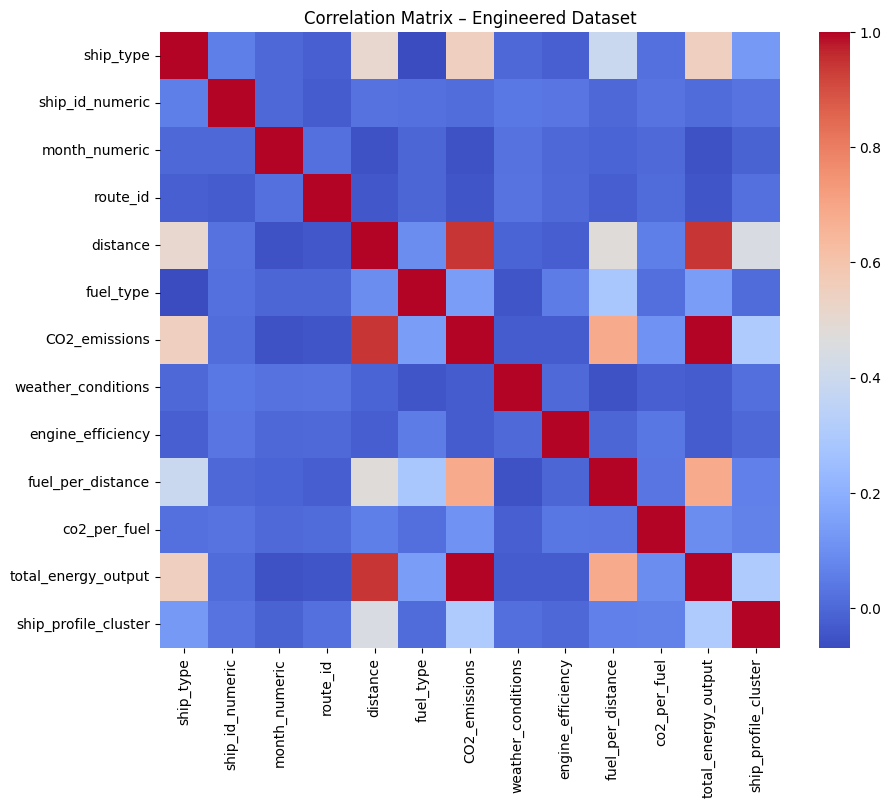

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load both datasets
df_orig = pd.read_csv("ship_fuel_efficiency_numeric.csv")
df_feat = pd.read_csv("regression_with_generated_features.csv")

# 2. Drop target from features
X_orig = df_orig.drop(columns=["fuel_consumption"])
X_feat = df_feat.drop(columns=["fuel_consumption"])
y = df_orig["fuel_consumption"]

# 3. Compare descriptive stats
print("\nOriginal Features:")
display(X_orig.describe().T)

print("\nFeature-Engineered Dataset:")
display(X_feat.describe().T)

# 4. Compare variance
print("\nOriginal Variance:")
print(X_orig.var().sort_values(ascending=False))

print("\nEngineered Variance:")
print(X_feat.var().sort_values(ascending=False))

# 5. Train-test split
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_orig, y, test_size=0.2, random_state=42)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_feat, y, test_size=0.2, random_state=42)

# 6. Model performance
model_orig = RandomForestRegressor(random_state=42)
model_orig.fit(Xo_train, yo_train)
yo_pred = model_orig.predict(Xo_test)

model_feat = RandomForestRegressor(random_state=42)
model_feat.fit(Xf_train, yf_train)
yf_pred = model_feat.predict(Xf_test)

# 7. Print performance metrics
print("\n🔴 Original Model:")
print("R²:", r2_score(yo_test, yo_pred))
print("MAE:", mean_absolute_error(yo_test, yo_pred))
print("RMSE:", np.sqrt(mean_squared_error(yo_test, yo_pred)))

print("\n🟢 Feature-Engineered Model:")
print("R²:", r2_score(yf_test, yf_pred))
print("MAE:", mean_absolute_error(yf_test, yf_pred))
print("RMSE:", np.sqrt(mean_squared_error(yf_test, yf_pred)))

# 8. Optional: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_feat.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix – Engineered Dataset")
plt.show()



After applying ratio, additive, and clustering-based features, the dataset remained realistic and statistically consistent with the original. Descriptive statistics and variance showed no extreme distortions. The model trained on the engineered dataset slightly outperformed the original in R² and reduced both MAE and RMSE. This confirms that the new features added meaningful predictive signal without overfitting or corrupting the data structure.